In [38]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import sklearn tools
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [32]:
#import data
#from the arrythmia dataset I chose to compare age and weight after testing multiple variables
#there is an obvious correlation between the 2 since people typically gain weight as they age before their weight levels off 

arrhythmia_data = pd.read_csv('/Users/u1100249/Desktop/arrhythmia.data')
#specifying the possible relevant columns and copy to preserve original
df = arrhythmia_data.iloc[:, [0, 3]].copy()
#giving the columns names
column_names = ['Age','Weight']
df.columns = column_names
df.head()

,Age,Weight
0,56,64
1,54,95
2,55,94
3,75,80
4,13,51


np.float64(0.3875113613524075)

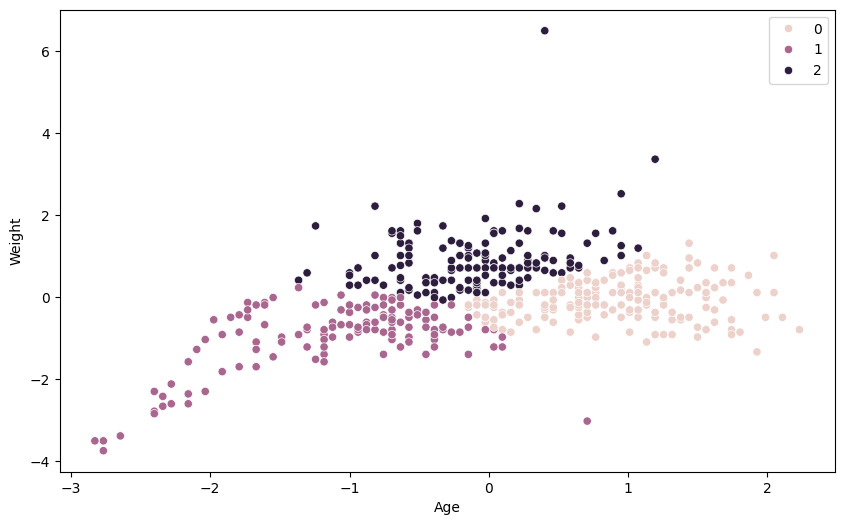

In [35]:
#demonstrate k-means clustering using the scikit learn package (50 points)

#standardize the data because variables are on different scales (years vs kg)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Weight']])
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Weight'])

#use Kmeans from sklearn
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=50)
kmeans.fit(df_scaled)

#plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_scaled, x = 'Age', y = 'Weight', hue = kmeans.labels_)
plt.plot()

#determine significance with silhouette score
silhouette_score(df_scaled, kmeans.labels_, metric='euclidean')
#score is lower than ideal (grater than 0.5 is preffered), but is a adequate for this demonstration.

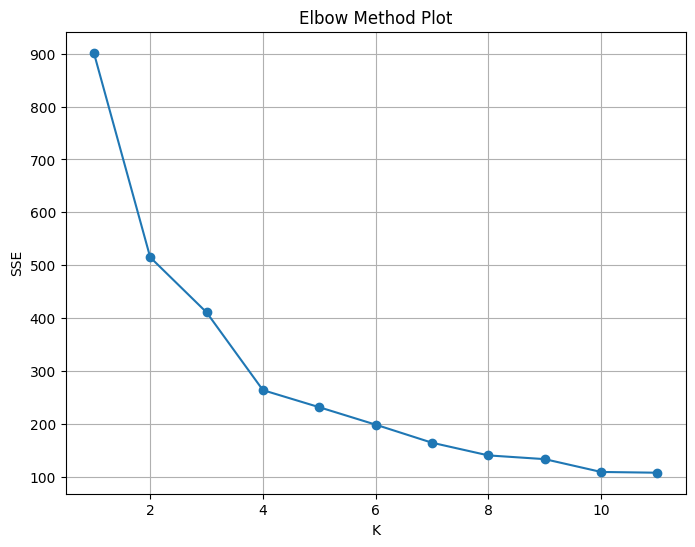

In [36]:
#Calculate the sum of square error (SSE) for each different values of 'k' (50 points).
means = []
inertia = []

for k in range(1,12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    means.append(k)
    inertia.append(kmeans.inertia_)

#Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation.
plt.figure(figsize=(8, 6))
plt.plot(means, inertia, marker='o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method Plot')
plt.grid(True)
plt.show()

#EXPLANATION: this for loop iterates over all possible values of k in the range 1-10 for the scaled data frame. 
#For each loop it appends the K and the corresponding inertia (or SSE) to the empty lists that were previously initialized. 
#When K and SSE are plotted below, we can see that a K value of 4 is ideal for this data frame.
#This is because after K=3 the effect of increasing K on the value of SSE is minimal and the slope is closer to level.

<function matplotlib.pyplot.show(close=None, block=None)>

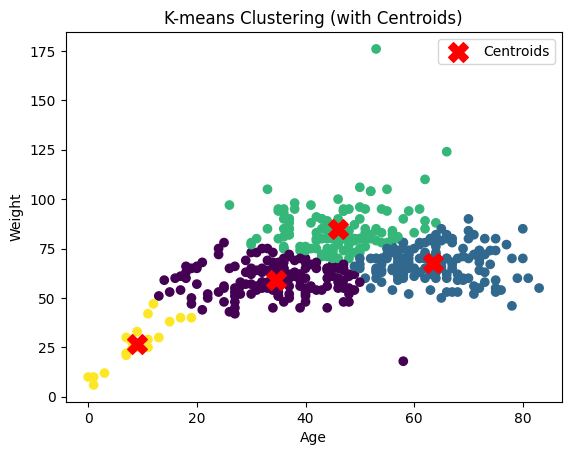

In [37]:
#Plot the optimal clusters with their centroids along with a brief explanation (50 points).

kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['Age', 'Weight']])

df['kmeans'] = kmeans.labels_

plt.scatter(x=df['Age'], y=df['Weight'], c=df['kmeans'])
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering (with Centroids)')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.show

#EXPLANATION: The plot below shows the data for age and weight, and uses a k cluster to lump the data into 4 groups.
#4 groups were selected in accordance with the elbow plot, and the centroids are marked with an x.
#the centroids are the center of each cluster and each data point is matched to its closest centroid. 
#the result shows 4 groups:
    #the yellow cluster contains low age and weight data points
    #the green cluster contains medium age and average weight data points
    #the blue cluster contains high age and average weight data points
    #the purple cluster contains medium to high age and slightly increased weight data points.